## 이상값 처리

In [1]:
import random 
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import os
if os.name =='nt':
    font_family ="Malgun Gothic"
else:
    font_family="AppleGothic"
    
sns.set(font=font_family, rc ={"axes.unicode_minus": False})

In [2]:
np_data= np.random.randint(1,100, size=3000)
data= list(np_data)
data[0:2]


[30, 88]

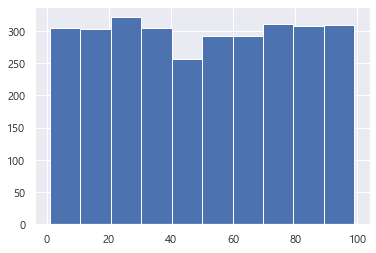

In [3]:
plt.hist(data)
plt.show()

50.016333333333336
28.720736989538104


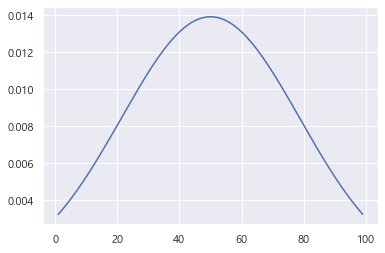

In [4]:

data_mean=np.mean(data)
data_std=np.std(data)

print(data_mean)
print(data_std)

pdf= stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

-7.815970093361102e-17
1.0


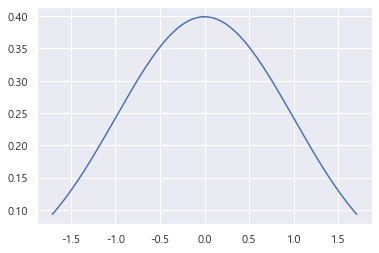

In [5]:
std_list=[]

for i in data:
    z=(i- data_mean)/data_std
    std_list.append(z)
    
ol_data_mean= np.mean(std_list)
ol_data_std= np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf= stats.norm.pdf(np.sort(std_list), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

50.09269102990033
28.816783703094213


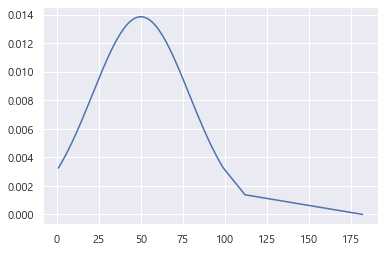

In [6]:
ol_data =data.copy()
ol_no= 10

for i in range(ol_no):
    rand_no =random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)
    
ol_data_mean =np.mean(ol_data)
ol_data_std =np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf= stats.norm.pdf(np.sort(ol_data), ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

9.206367672639172e-17
1.0


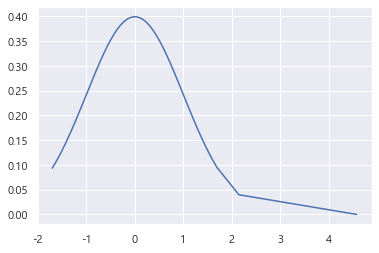

In [7]:
ol_std_list=[]
for i in ol_data:
    z=(i- ol_data_mean)/ ol_data_std
    ol_std_list.append(z)
    
    
ol_st_data_mean= np.mean(ol_std_list)
ol_st_data_std= np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf= stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)



plt.figure()
plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [8]:
len(ol_std_list)

3010

In [9]:
for i in ol_std_list:
    z=i
    if z>2:
        ol_std_list.remove(z)
    if z<-2:
        ol_std_list.remove(z)

In [10]:
len(ol_std_list)

3008

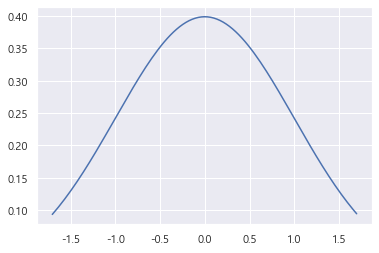

In [11]:
ol_std_pdf= stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [12]:
boxdata= pd.DataFrame(np.random.randn(100,3), columns=["A열","B열","C열"])

boxdata.head()

,A열,B열,C열
0,0.249358,-1.841856,0.508064
1,0.380297,-0.661581,-0.610393
2,-0.103764,0.988506,-0.328746
3,-0.430227,-0.959583,0.865598
4,-0.450829,0.113501,-0.335776


In [13]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,0.129014,-0.019699,-0.219703
std,0.915010,1.093263,0.860850
min,-2.113788,-2.827702,-2.300342
25%,-0.482943,-0.599258,-0.621983
50%,0.101985,0.043938,-0.114441
75%,0.677581,0.672971,0.342138
max,2.578091,2.249780,1.896224


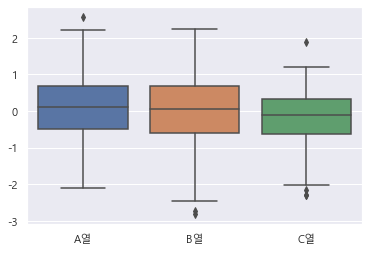

In [14]:
sns.boxplot(data= boxdata)
plt.show()

In [15]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25=np.percentile(df[column].values,25)
    quantile_75=np.percentile(df[column].values, 75)
    
    IQR= quantile_75 - quantile_25
    IQR_weight= IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest= quantile_75 + IQR_weight
    
    outlier_idx=df[column][(df[column]<lowest)| (df[column]>highest)].index
    return outlier_idx

In [16]:
outlier_idx= get_outlier(df=boxdata, column='B열', weight=1.5)
outlier_idx

Int64Index([63, 74], dtype='int64')

In [17]:
boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

(98, 3)

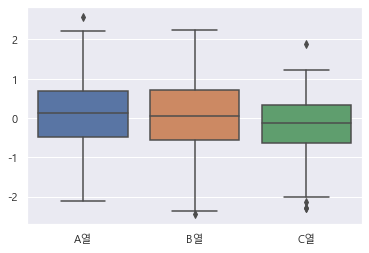

In [18]:
sns.boxplot(data=boxdata)
plt.show()

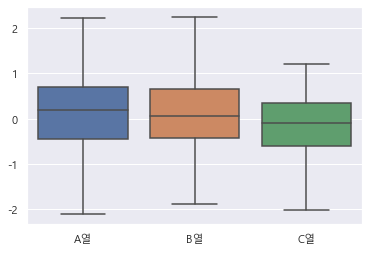

In [27]:
outlier_idx= get_outlier(df=boxdata, column='A열', weight=1.5)

outlier_idx

boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

sns.boxplot(data= boxdata)
plt.show()

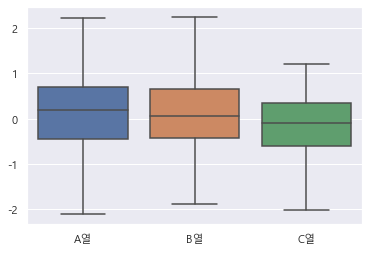

In [26]:
outlier_idx= get_outlier(df=boxdata, column='B열', weight=1.5)

outlier_idx

boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

sns.boxplot(data= boxdata)
plt.show()

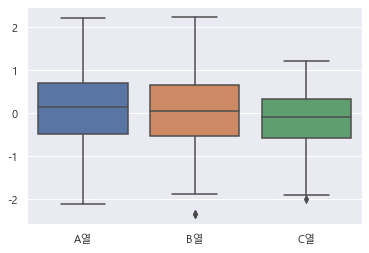

In [24]:
outlier_idx= get_outlier(df=boxdata, column='C열', weight=1.5)

outlier_idx

boxdata.drop(outlier_idx, axis=0, inplace=True)

boxdata.shape

sns.boxplot(data= boxdata)
plt.show()

In [25]:
boxdata.shape

(92, 3)